" Project: Investigate No-show appointments",

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 "**choosen dataset**: [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)",

"**Description**: i will anayziz  dataset collects information from 100k medical appointments in Brazil, i did the data based on Gender, Age, Economics, Disease, Technical Aptitude, or Wait time were indicators of a patient showing up for an appointment"
"is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row",

 "    \"The questions that can be formulated and answered with the help of this dataset are",
 
    "    "1. What characteristics will used to know if a patient will come for their appointment?",
    
    "    "2. What is the gender of patients come for their appointment/ not come for their appointment?",
    
    "    "3. What is the age of patients come for their appointment/ not come for their appointment?",
    
    "    "4. What Locations is the highest number of patients not come for their appointment?",
    
    "    "5. patients receiving SMS are more likely to come?",
    
    "    "6. is patients not come for their appointment their wait time is large?",

"To understand if female or male appear more to the medical appointment"

"To know if scholarship can increase the chance of showing up"

"To know if the diseases have an influence on no-shows"

"To understand if people in certain neighbourhood are more like of showing up"

"To understand if the SMS can improve the rate of patient who of showing up"

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

% matplotlib inline

# Data Wrangling

### General Properties



In [2]:
df = pd.read_csv('No-Showsappointments.csv')

"Printing few lines:"

In [3]:
df.duplicated().sum()

0

In [4]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.drop_duplicates(inplace = True)

knw Types daTa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.info()

df[df['Age'] <= 0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [10]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [11]:
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

In [12]:
df.rename(columns=lambda x:x.strip().lower().replace(" ", "_"), inplace=True)

In [13]:
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


delet any missing values

delet duplicate rows 

delet 0 AppointmentID/PatientsId values

Check the values in the Gender column

Convert AppointmentDay and ScheduledDay from String to DateTime format

Update the values in the status, gender, scholarship, hypertension, diabetes, alcoholism, SMS_received columns to make them more user friendly

<a id='eda'></a>
## Exploratory Data Analysis

 "With the actual shape of the data, we could easily compare different PatientsID of the given data, which we should remember for later. On the other hand the data is not tidy enough to make good visializations or calculations. The next step will handle this problem by melting the dataframe, so that each PatientsID will be an own row Viewing the first rows of the data frame. The dataframe will also be sorted by the Gender  and age."

What Gender of Patients?

In [14]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

% matplotlib inline

In [15]:
df = pd.read_csv('No-Showsappointments.csv')

In [16]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
showed = df['show'] = 0

not_showed = df['No_show'] = 1

df['showed'] = showed

df['not_showed'] = not_showed

In [18]:
def percentage(amount,total):
    
    return (amount / total) * 100

Scholarship
0    1
1    1
Name: No_show, dtype: int64


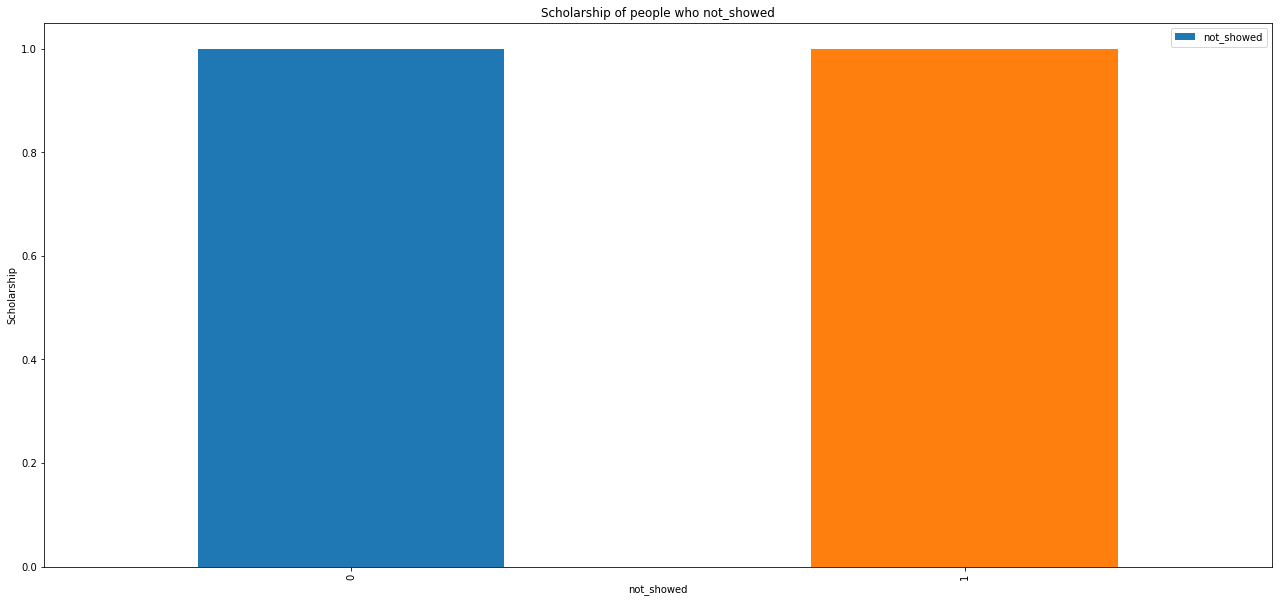

In [19]:
print(df.groupby('Scholarship')['No_show'].mean())

df.groupby('Scholarship')['not_showed'].mean().plot(kind='bar',figsize=(22,10));

plt.xlabel("not_showed")

plt.ylabel("Scholarship")

plt.title("Scholarship of people who not_showed")

plt.legend()

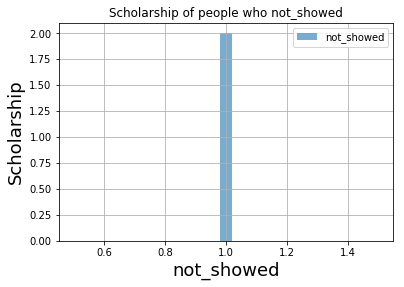

In [20]:
df.groupby('Scholarship')['No_show'].mean().hist(alpha=0.6,bins=25,label='not_showed');

#x-axis label

plt.xlabel("not_showed" , fontsize = 18)

#y-axis label

plt.ylabel("Scholarship" , fontsize = 18)

plt.title("Scholarship of people who not_showed")

plt.legend()

Females patients "No-show appointments" who have a scholarship is 14.43% 

Males patients ""No-show appointments" who have a scholarship is 6.11% 

Alcoholism
0    1
1    1
Name: not_showed, dtype: int64


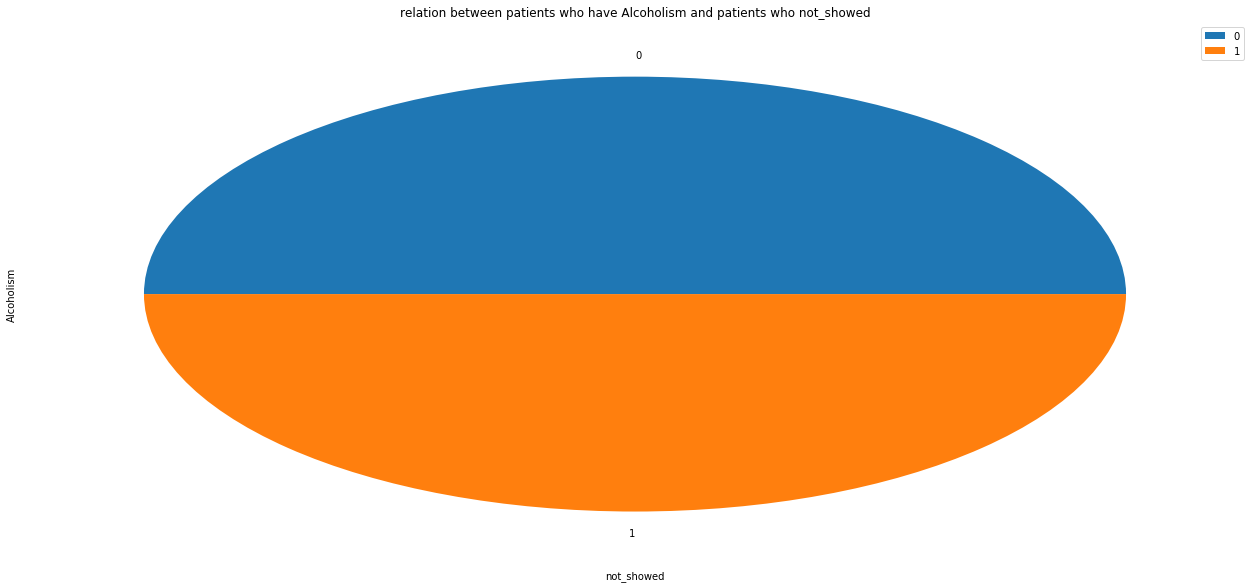

In [21]:
print(df.groupby('Alcoholism')['not_showed'].mean())

df.groupby('Alcoholism')['not_showed'].mean().plot(kind = 'pie',figsize=(22,10))

plt.xlabel("not_showed")

plt.ylabel("Alcoholism")

plt.title("relation between patients who have Alcoholism and patients who not_showed")

plt.legend()

Females patients "No-show appointments" who have a experiance alcoholism 2.11% ;

Males patients ""No-show appointments" who have a experiance alcoholism 4.78% ;

Handcap
0    1
1    1
2    1
3    1
4    1
Name: not_showed, dtype: int64


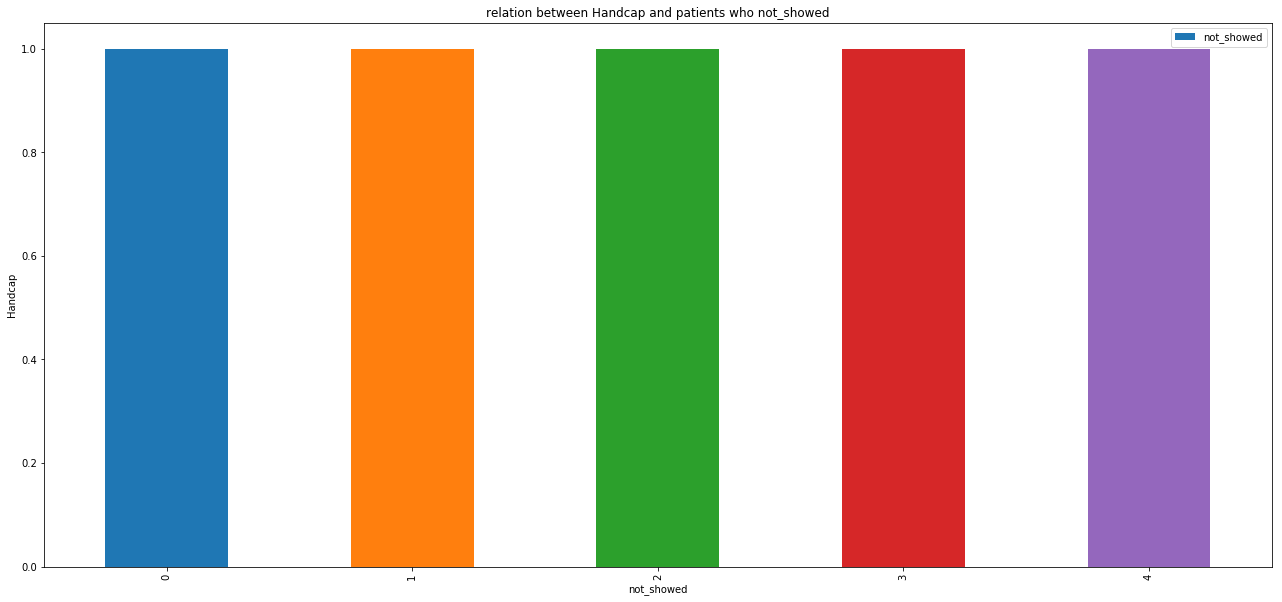

In [22]:
print(df.groupby('Handcap')['not_showed'].mean())

df.groupby('Handcap')['not_showed'].mean().plot(kind='bar',figsize=(22,10));

plt.xlabel("not_showed")

plt.ylabel("Handcap")

plt.title("relation between Handcap and patients who not_showed")

plt.legend()

Females patients "No-show appointments" who have a experiance Handicap 98.34% ;

Males patients ""No-show appointments" who have a experiance Handicap 97.89% ;

What is the impact of Age of patients on the patients attending the appointment or not?

Age
-1      1
 0      1
 1      1
 2      1
 3      1
 4      1
 5      1
 6      1
 7      1
 8      1
 9      1
 10     1
 11     1
 12     1
 13     1
 14     1
 15     1
 16     1
 17     1
 18     1
 19     1
 20     1
 21     1
 22     1
 23     1
 24     1
 25     1
 26     1
 27     1
 28     1
       ..
 73     1
 74     1
 75     1
 76     1
 77     1
 78     1
 79     1
 80     1
 81     1
 82     1
 83     1
 84     1
 85     1
 86     1
 87     1
 88     1
 89     1
 90     1
 91     1
 92     1
 93     1
 94     1
 95     1
 96     1
 97     1
 98     1
 99     1
 100    1
 102    1
 115    1
Name: not_showed, Length: 104, dtype: int64


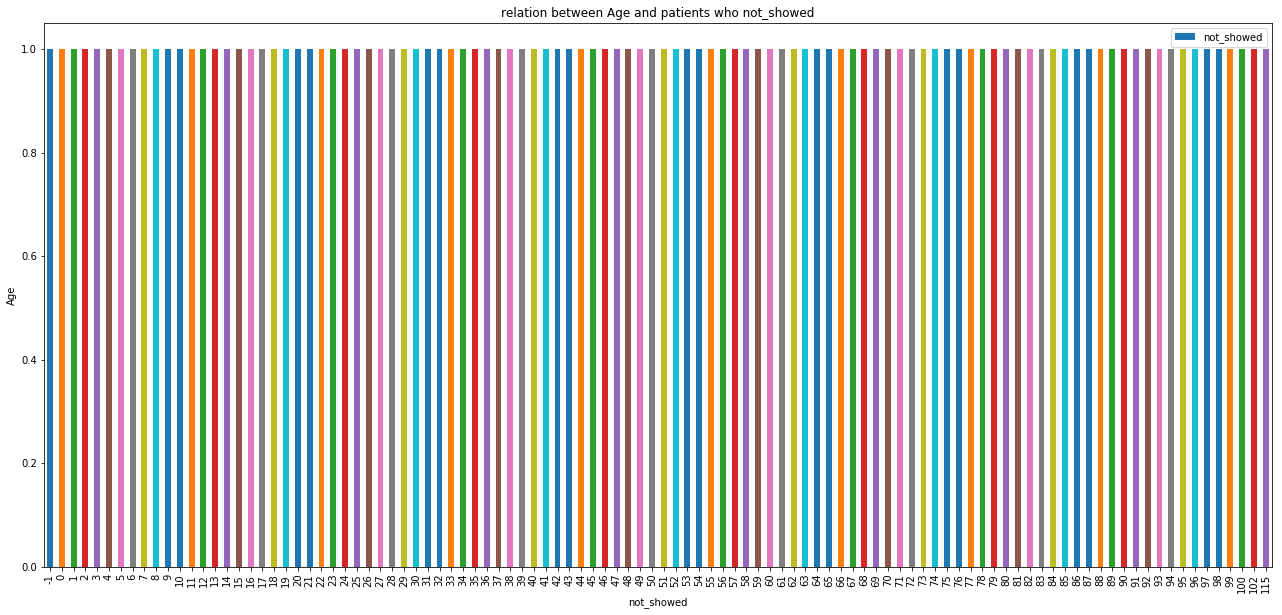

In [23]:
print(df.groupby('Age')['not_showed'].mean())

df.groupby('Age')['not_showed'].mean().plot(kind='bar',figsize=(22,10));

plt.xlabel("not_showed")

plt.ylabel("Age")

plt.title("relation between Age and patients who not_showed")

plt.legend()

Females: 33.23% of the 'NoShowUp' appointments belong to female patients from the age group (20-39yrs);

Males: 40.79% of the 'NoShowUp' appointments belong to male patients from the age group (0-19yrs);

Females: The recurring patients from the age group (100 - 119) have the greatest proportion of (66.67%)

Males: The recurring patients from the age group (0 - 19) have the greatest proportion of (22.25%)

Scholarship
0    1
1    1
Name: not_showed, dtype: int64


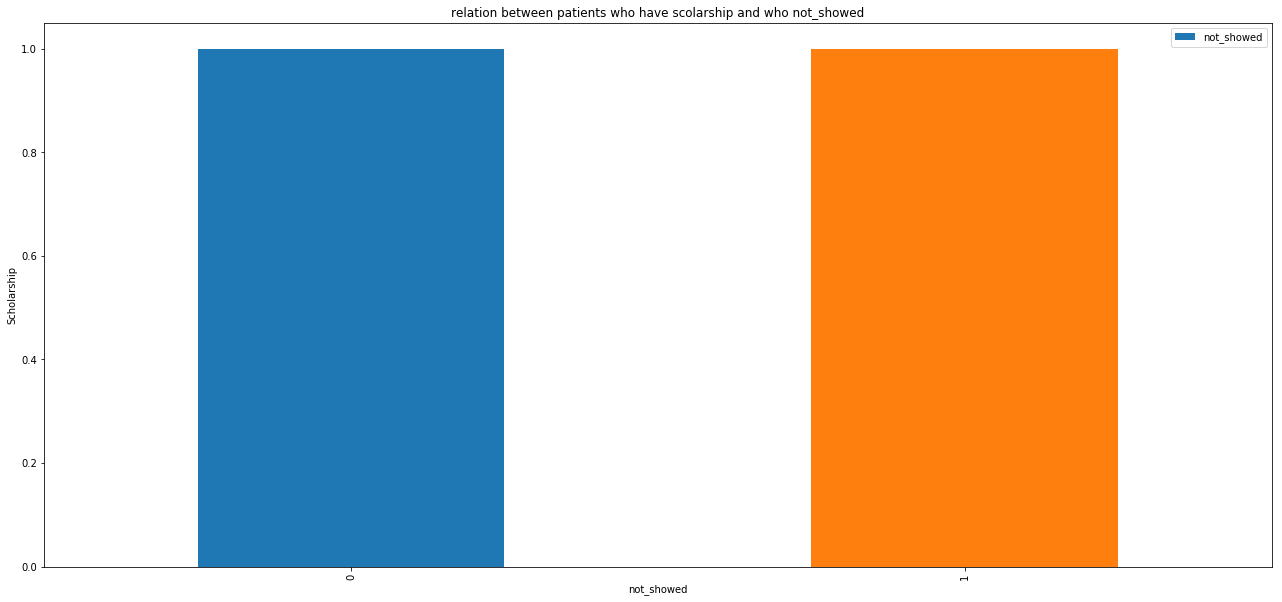

In [24]:
print(df.groupby('Scholarship')['not_showed'].mean())

df.groupby('Scholarship')['not_showed'].mean().plot(kind = 'bar',figsize=(22,10))

plt.xlabel("not_showed")

plt.ylabel("Scholarship")

plt.title("relation between patients who have scolarship and who not_showed")

plt.legend()

Age group (20-39) has the highest percentage (15.23%) of NoShow appointments where patients have a scholarship;

Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have no scholarship;

Age group (0-19) has the highest percentage (26.34%) of recurring patients who have a scholarship.

Age group (100-119) has the highest percentage (66.67%) of recurring patients who have no scholarship.

Diabetes
0    1
1    1
Name: not_showed, dtype: int64


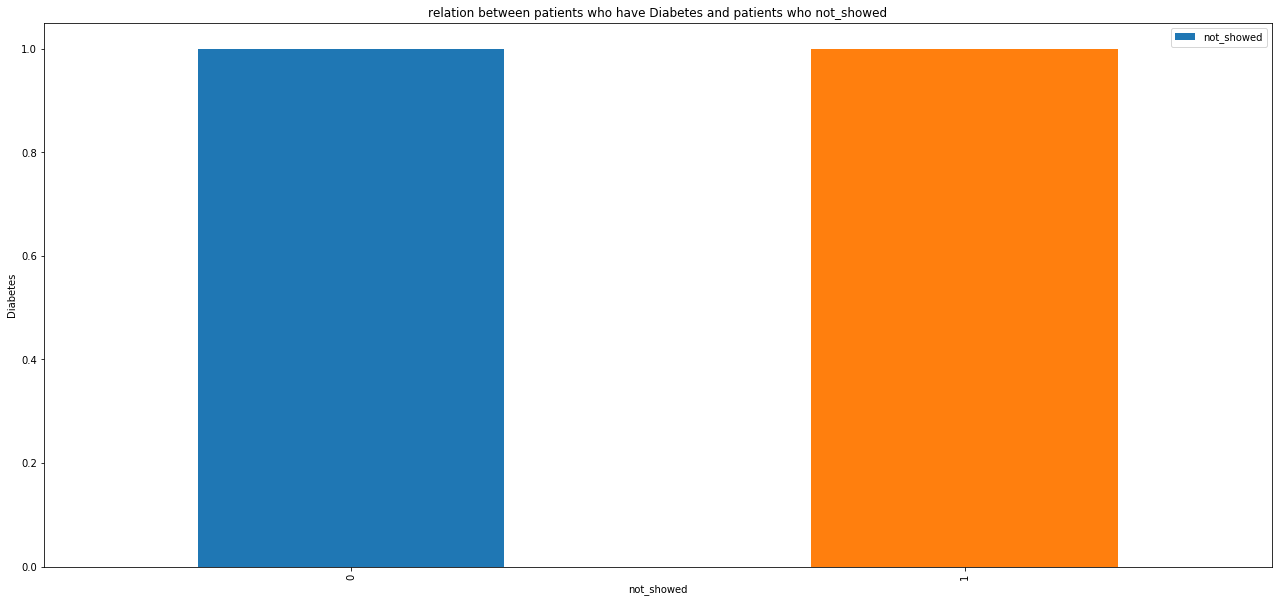

In [25]:
print(df.groupby('Diabetes')['not_showed'].mean())

df.groupby('Diabetes')['not_showed'].mean().plot(kind = 'bar',figsize=(22,10))

plt.xlabel("not_showed")

plt.ylabel("Diabetes")

plt.title("relation between patients who have Diabetes and patients who not_showed")

plt.legend()

In [26]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

% matplotlib inline

In [27]:
df = pd.read_csv('No-Showsappointments.csv')

In [28]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [29]:
showed = df['show'] = 0

not_showed = df['No_show'] = 1

df['showed'] = showed

df['not_showed'] = not_showed

In [30]:
def percentage(amount,total):
    
    return (amount / total) * 100

Diabetes
0    1
1    1
Name: not_showed, dtype: int64


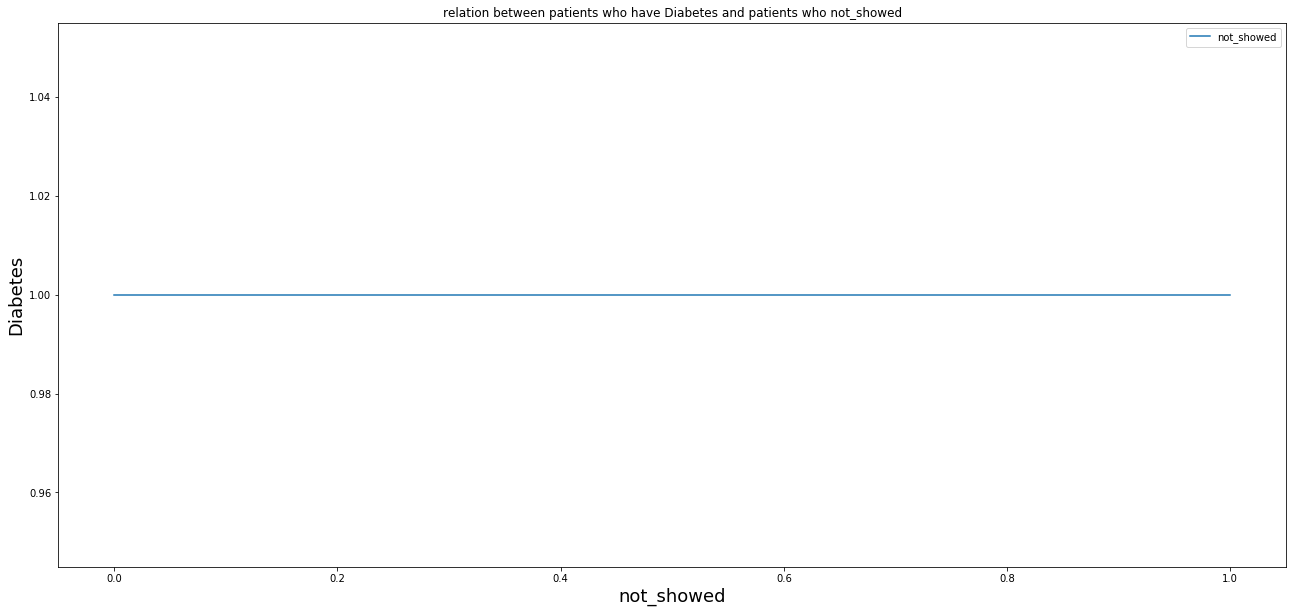

In [31]:
print(df.groupby('Diabetes')['not_showed'].mean())

df.groupby('Diabetes')['not_showed'].mean().plot(kind = 'line',figsize= (22,10))

#x-axis label

plt.xlabel("not_showed" , fontsize = 18)

#y-axis label

plt.ylabel("Diabetes" , fontsize = 18)

plt.title("relation between patients who have Diabetes and patients who not_showed")

plt.legend()

Looking at the No ShowUp (%) chart, we found that:

Age group (60 - 79) has the highest percentage (24%) of NoShow appointments where patients have a diabetes;
Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have no diabetes;
Looking at the Recurring patients (%) chart, we found that:

Age group (40 - 59) has the highest percentage (20.52%) of recurring patients who have a diabetes.
Age group (100-119) has the highest percentage (66.67%) of recurring patients who have no diabetes.

<a id='conclusions'></a>
## Conclusions

"For all categorical variables the different of patients gender come for their appointment/ not come the gender group F showing up for their appointments. There is clear indication of any of these variables having bigger then others impact patients come for their appointment/ not come for their appointment."

"For all categorical variables the different of patients age come for their appointment/ not come the gender group 56 and above showing up for their appointments. There is clear indication of any of these variables having bigger then others impact patients come for their appointment/ not come for their appointment."

"most surprisingly is a higher percentage of people that receved an SMS reminding the patients of their upcoming appointment made things worse.."

"Being enrolled in the Scholarship program does not seem to make people more likely to show up to the appointment"

<a id='conclusions'></a>
## Limitations

"The analysis is belong to the setting. Any findings or trends cannot be induced to another population or to another setting.",

"We do not have a lot of details for certain factors to draw conclusions. For the SMS recelved example, the data shows that no-showers are more likely to recerve an SMs. This may seem counter intuibve, but we do not have intormabon on the conditons of when the SMS IS."

In this section, we've limited our work to 3 variables:

Gender

Age (Age Groups)

1.Females patients "No-show appointments" who have a scholarship is 14.43% 

Males patients ""No-show appointments" who have a scholarship is 6.11% 

Females patients "No-show appointments" who have a experiance alcoholism 2.11% ;

Males patients ""No-show appointments" who have a experiance alcoholism 4.78% ;

Females patients "No-show appointments" who have a experiance Handicap 98.34% ;

Males patients ""No-show appointments" who have a experiance Handicap 97.89% ;

2.Females patients from the age group (20-39yrs) "No-show appointments" is 33.23%; 

Males patients from the age group (0-19yrs)"No-show appointments" is 40.79%;

Age group (20-39) has the highest percentage (15.23%) of NoShow appointments where patients have a scholarship; 

where Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have no scholarship;

Age group (60 - 79) has the highest percentage (24%) of NoShow appointments where patients have a diabetes;

where Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have no diabetes;

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0